In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import altair as alt
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## Import csv

In [4]:
df = pd.read_csv("data/consolidated_2022-10-13_v1", index_col = None)
df = df.drop(columns = 'Unnamed: 0')
df.columns = ["time", "temp", "wt", "dta", "wt_pc", "compound", "condition"]

## Test Train Split

In [5]:
def test_train_compound(df, product):
    """
    Function to split test/train data for each compound
    
    Argument:
        df      : pandas dataframe
        product : tbbpa, caoh2, both
        
    Output:
        X_train, X_test, y_train, y_test : 4 pandas dataframe which have the split data 
    """
    df = df.query('compound == @product')
    X_train, X_test, y_train, y_test = train_test_split(df[["time", "temp", "condition" ]], df["wt"], test_size=0.2, random_state=7)
    return X_train, X_test, y_train, y_test

## Modelling

### Linear Modelling

In [51]:
def linear_model(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    lr = LinearRegression().fit(X_train, y_train)
    print("The training accuracy for the model is ", lr.score(X_train, y_train))
    print("The testing accuracy for the model is ", lr.score(X_test, y_test))
for i in df.compound.value_counts().index:
    linear_model(df, i)

The 4 matrices for -- tbbpa -- are of sizes:  (31132, 3) (7783, 3) (31132,) (7783,)
The training accuracy for the model is  0.8241165411318243
The testing accuracy for the model is  0.8177440908139991
The 4 matrices for -- caoh2 -- are of sizes:  (31108, 3) (7778, 3) (31108,) (7778,)
The training accuracy for the model is  0.8452718463394618
The testing accuracy for the model is  0.8425280291844488
The 4 matrices for -- both -- are of sizes:  (31068, 3) (7767, 3) (31068,) (7767,)
The training accuracy for the model is  0.9282599428748095
The testing accuracy for the model is  0.9281879293428571


## Random Forest

In [52]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf = RandomForestRegressor(random_state=0).fit(X_train, y_train)
    print("The training accuracy for the model is ", rf.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf.score(X_test, y_test))
for i in df.compound.value_counts().index:
    random_forest(df, i)

The 4 matrices for -- tbbpa -- are of sizes:  (31132, 3) (7783, 3) (31132,) (7783,)
The training accuracy for the model is  0.9999999548192982
The testing accuracy for the model is  0.9999997232221379
The 4 matrices for -- caoh2 -- are of sizes:  (31108, 3) (7778, 3) (31108,) (7778,)
The training accuracy for the model is  0.9999999491732414
The testing accuracy for the model is  0.9999997015847268
The 4 matrices for -- both -- are of sizes:  (31068, 3) (7767, 3) (31068,) (7767,)
The training accuracy for the model is  0.9999999756134385
The testing accuracy for the model is  0.999999888633666


In [ ]:
max_depth = range(1, 10)
X_train, X_test, y_train, y_test = test_train_compound(df, "tbbpa")
depth = []
train_acc = []
test_acc = []
for i in max_depth:
    depth.append(i)
    rf = RandomForestRegressor(max_depth = i, random_state=0).fit(X_train, y_train)
    train_acc.append(rf.score(X_train, y_train))
    test_acc.append(rf.score(X_test, y_test))
    print(i)
df_rf = pd.DataFrame({'training' : train_acc,
                      'testing' : test_acc,
                      'max_depth' : depth})
df_rf = df_rf.melt(id_vars = 'max_depth', var_name = 'Type', value_name = 'Accuracy')

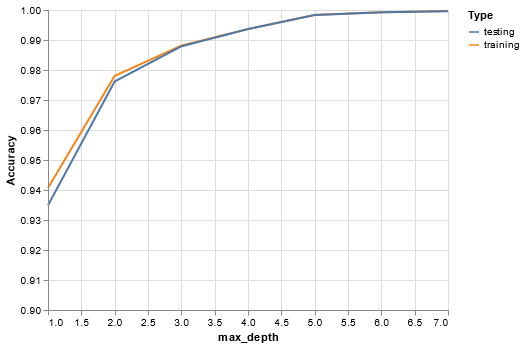

In [86]:
alt.Chart(df_rf.query("max_depth < 8")).mark_line().encode(
    alt.X('max_depth'),
    alt.Y('Accuracy', scale=alt.Scale(domain=[0.9, 1])),
    alt.Color('Type:N'))

## Support Vector Regression

In [ ]:

svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [7]:
def fn_svr_rbf(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1).fit(X_train, y_train)
    print("The training accuracy for the model is ", svr_rbf.score(X_train, y_train))
    print("The testing accuracy for the model is ", svr_rbf.score(X_test, y_test))
for i in df.compound.value_counts().index:
    fn_svr_rbf(df, i)

The 4 matrices for -- tbbpa -- are of sizes:  (31132, 3) (7783, 3) (31132,) (7783,)
The training accuracy for the model is  0.999092342646466
The testing accuracy for the model is  0.9990811126548853
The 4 matrices for -- caoh2 -- are of sizes:  (31108, 3) (7778, 3) (31108,) (7778,)
The training accuracy for the model is  0.9909938201261017
The testing accuracy for the model is  0.9909521849112124
The 4 matrices for -- both -- are of sizes:  (31068, 3) (7767, 3) (31068,) (7767,)
The training accuracy for the model is  0.9947589263560653
The testing accuracy for the model is  0.9947807740739544


In [ ]:
def fn_svr_lin(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    svr_lin = SVR(kernel="linear", C=100, gamma="auto").fit(X_train, y_train)
    print("The training accuracy for the model is ", svr_lin.score(X_train, y_train))
    print("The testing accuracy for the model is ", svr_lin.score(X_test, y_test))
for i in df.compound.value_counts().index:
    fn_svr_lin(df, i)

The 4 matrices for -- tbbpa -- are of sizes:  (31132, 3) (7783, 3) (31132,) (7783,)
